### Exploratory data analysis for automated annotations

In [1]:
from tokenize import group

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from Demos.mmapfile_demo import offset

D:\TEMP\tmp57j8a0ai 32768 tmp57j8a0ai


In [2]:
automated_file = "AutomatedAnnotations_ALL.csv"
manual_file = ""
file = automated_file

df = pd.read_csv(file)
df.head()

,datasetName,folderName,imageName,Age,Gender,Race
0,AffectNet - Test,anger,image0000006,30,Woman,white
1,AffectNet - Test,anger,image0000060,34,Man,white
2,AffectNet - Test,anger,image0000061,44,Man,white
3,AffectNet - Test,anger,image0000066,49,Man,white
4,AffectNet - Test,anger,image0000106,30,Man,black


### Histograms for all the data

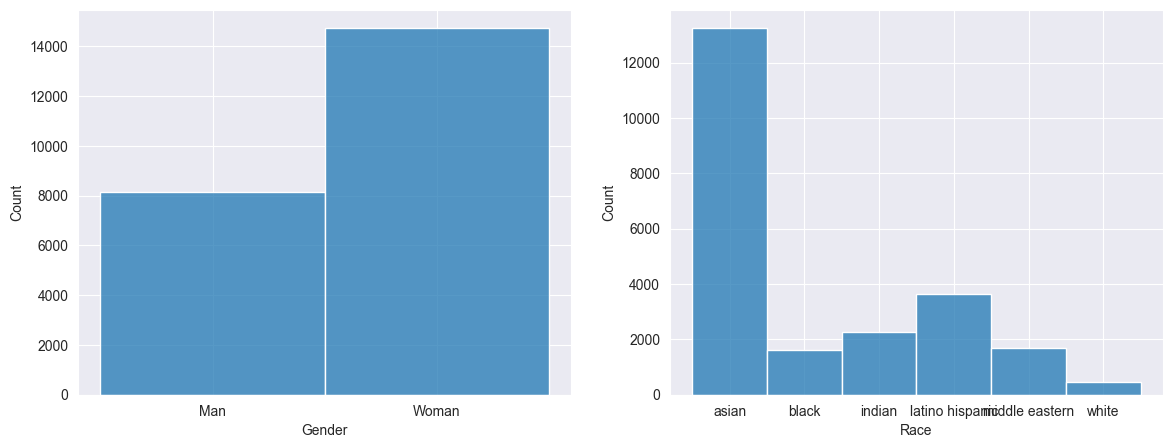

In [3]:
interest_columns = ["Gender", "Race"]

fig, axes = plt.subplots(1, len(interest_columns), figsize=(14, 5))
for axis, data in zip(axes, [df.Gender, df.Race]):
    sns.histplot(data, ax=axis)
    axis.set_xticks(range(len(data.unique())))
    axis.set_xticklabels(sorted(data.unique()))

### Histograms grouped by dataset

In [10]:
dataset_grouped = df.groupby('datasetName', )

In [ ]:
def grouped_df_box_plot(df: pd.DataFrame, column: str) -> None:
    # dict of distinct column value: count pairs.
    # df_counts = dataset_grouped[column].value_counts()
    fig, axes = plt.subplots(int(len(df) ** 0.5), int(len(df) ** 0.5), figsize=(10, 10))
    fig.tight_layout(pad=7)

    dataset_names = df["datasetName"].unique()
    for i in dataset_names.values:
        counts = df.where(dataset_names == i[0]).value_counts(column)
        current_axis = axes[i // int(len(df) ** 0.5), i % int(len(df) ** 0.5)] 
        sns.boxplot(x=group[column], ax=current_axis)
        current_axis.set_title(name)
        current_axis.tick_params(axis='x', labelrotation=30)

    fig.suptitle(f"{column} distribution of each dataset", fontsize=16)

    print(f"Using dataset: {file}")

    
    
grouped_df_box_plot(df, "Gender") 

In [8]:
# Gender

# fig, axes = plt.subplots(len(dataset_grouped) // 2, len(dataset_grouped) // 2, figsize=(6, 6))
# fig.tight_layout(pad=4)

grouped_df_box_plot(dataset_grouped, "Gender")
# for i, (name, group) in enumerate(dataset_grouped):
#     
#     sns.histplot(group["Gender"], ax=axes[i // 2, i % 2])
#     axes[i // 2, i % 2].set_title(name)

fig.suptitle("Gender distribution of each dataset", fontsize=14)

print(f"Using dataset: {file}")

NameError: name 'grouped_df_box_plot' is not defined

Using dataset: AutomatedAnnotations_ALL.csv


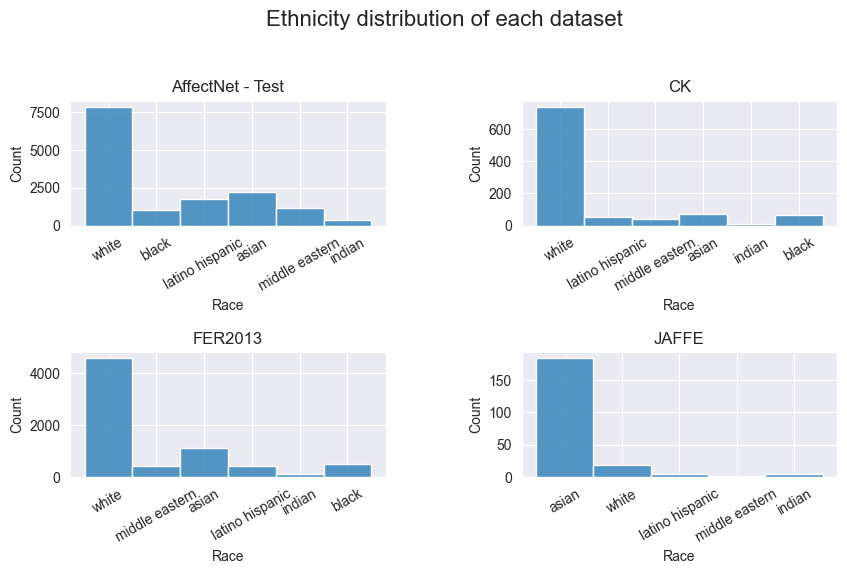

In [6]:
dataset_grouped = df.groupby('datasetName')

fig, axes = plt.subplots(len(dataset_grouped) // 2, len(dataset_grouped) // 2, figsize=(10, 6))
fig.tight_layout(pad=7)

x_label_order = ["white", "middle eastern", "latino hispanic", "indian", "black", "asian"]
for i, (name, group) in enumerate(dataset_grouped):
    sns.histplot(group["Race"], ax=axes[i // 2, i % 2], stat="count", discrete=True)
    axes[i // 2, i % 2].set_title(name)
    axes[i // 2, i % 2].tick_params(axis='x', labelrotation=30)

fig.suptitle("Ethnicity distribution of each dataset", fontsize=16)

print(f"Using dataset: {file}")